In [40]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

In [41]:
configs = [
    {
        'alg': 'random_hill_climb',
        'lr': 0.1,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
    },
    {
        'alg': 'random_hill_climb',
        'lr': 1,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
    },
    {
        'alg': 'random_hill_climb',
        'lr': 10,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
    },
]

In [42]:
COLORS = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

0.1
1001
1901
2801
1
1301
1901
4901
10
601
4101
5701


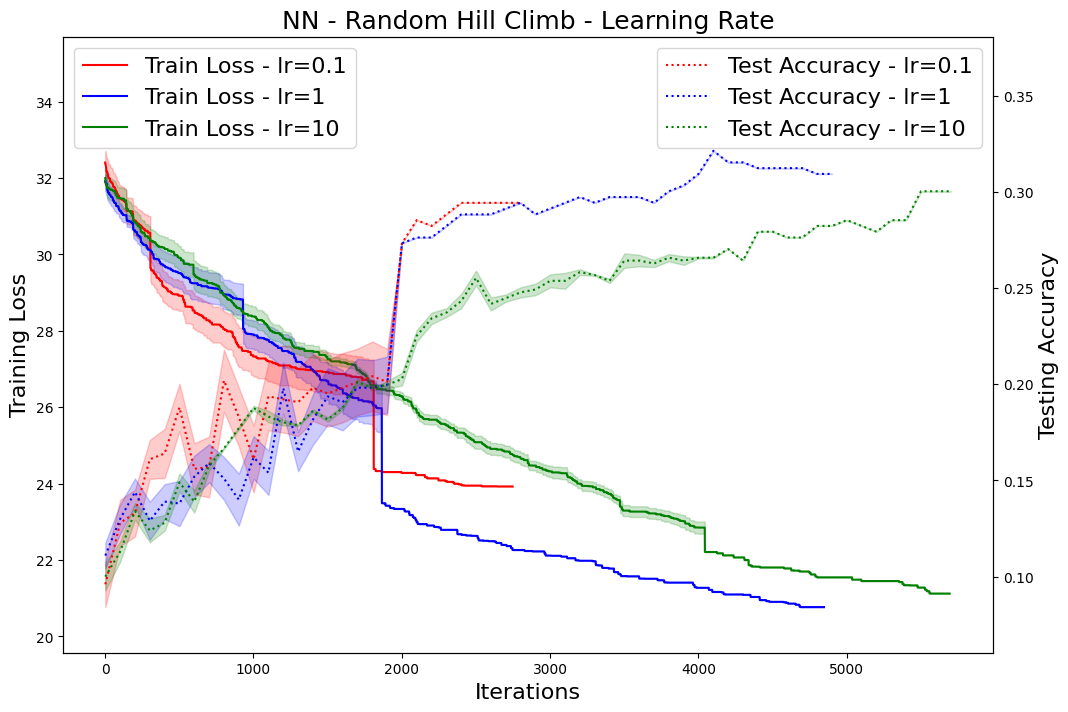

In [43]:
FONTSIZE = 18
# use two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('NN - Random Hill Climb - Learning Rate', fontsize=FONTSIZE)
ax2 = ax1.twinx()
ax1.set_xlabel('Iterations', fontsize=FONTSIZE-2)
ax1.set_ylabel('Training Loss', fontsize=FONTSIZE-2)
ax2.set_ylabel('Testing Accuracy', fontsize=FONTSIZE-2)

max_y1 = 0
min_y1 = np.inf
max_y2 = 0
min_y2 = np.inf

for config_i, config in enumerate(configs):
    path = "metrics/{alg}/{alg}_lr{lr}_clip{clip}_max_attempts{max_attempts}_hidden_nodes{hidden_nodes}.pkl".format(**config)
    data = pickle.load(open(path, "rb"))

    mean_test_accuracies = []
    std_test_accuracies = []
    n = max([len(run['test_scores']) for run in data['runs']])
    for i in range(n):
        accuracies = [run['test_scores'][i] for run in data['runs'] if i < len(run['test_scores'])]
        mean_test_accuracies.append(np.mean(accuracies))
        std_test_accuracies.append(np.std(accuracies))
    mean_test_accuracies = np.array(mean_test_accuracies)
    std_test_accuracies = np.array(std_test_accuracies) / 4
    max_y2 = max(max_y2, np.max(mean_test_accuracies + std_test_accuracies))
    min_y2 = min(min_y2, np.min(mean_test_accuracies - std_test_accuracies))
    
    max_len = 0
    iterations = None
    print(config['lr'])
    for run in data['runs']:
        print(run['iterations'].max())
        if len(run['iterations']) > max_len:
            max_len = len(run['iterations'])
            iterations = run['iterations']
    iterations = np.array(iterations)
        
    mean_train_losss = []
    std_train_losss = []
    n = max([len(run['fitness_curve']) for run in data['runs']])
    for i in range(n):
        losses = [run['fitness_curve'][i][0] for run in data['runs'] if i < len(run['fitness_curve'])]
        mean_train_losss.append(np.mean(losses))
        std_train_losss.append(np.std(losses))
    mean_train_losss = np.array(mean_train_losss)
    std_train_losss = np.array(std_train_losss) / 4
    max_y1 = max(max_y1, np.max(mean_train_losss + std_train_losss))
    min_y1 = min(min_y1, np.min(mean_train_losss - std_train_losss))

    FILL_ALPHA = 0.2

    ax1.plot(mean_train_losss, label="Train Loss - lr={lr}".format(**config), 
             linestyle='-', color=COLORS[config_i])
    ax1.fill_between(range(len(mean_train_losss)), 
                     mean_train_losss - std_train_losss, 
                     mean_train_losss + std_train_losss, 
                     alpha=FILL_ALPHA, color=COLORS[config_i])

    ax2.plot(iterations, mean_test_accuracies, label="Test Accuracy - lr={lr}".format(**config), 
             linestyle='dotted', color=COLORS[config_i])
    ax2.fill_between(iterations, 
                     mean_test_accuracies - std_test_accuracies, 
                     mean_test_accuracies + std_test_accuracies, 
                     alpha=FILL_ALPHA, color=COLORS[config_i])

range_1 = max_y1 - min_y1
range_2 = max_y2 - min_y2
lower_margin = 0.1
upper_margin = 0.25
ax1.set_ylim(min_y1 - lower_margin * range_1, max_y1 + upper_margin * range_1)
ax2.set_ylim(min_y2 - lower_margin * range_2, max_y2 + upper_margin * range_2)

ax1.legend(loc='upper left', fontsize=FONTSIZE-2)
ax2.legend(loc='upper right', fontsize=FONTSIZE-2)
fig.savefig('nn_rhc_lr.png')

In [44]:
config

{'alg': 'random_hill_climb',
 'lr': 10,
 'clip': 5,
 'max_attempts': 100,
 'hidden_nodes': [10]}

In [45]:
df_data = {'Algorithm': [], 'Learning Rate': [], 'Max Attempts': [], 'Test Accuracy': []}

for config_i, config in enumerate(configs):
    path = "metrics/{alg}/{alg}_lr{lr}_clip{clip}_max_attempts{max_attempts}_hidden_nodes{hidden_nodes}.pkl".format(**config)
    data = pickle.load(open(path, "rb"))

    mean_test_accuracies = []
    std_test_accuracies = []
    n = max([len(run['test_scores']) for run in data['runs']])
    for i in range(n):
        accuracies = [run['test_scores'][i] for run in data['runs'] if i < len(run['test_scores'])]
        mean_test_accuracies.append(np.mean(accuracies))
        std_test_accuracies.append(np.std(accuracies))
    mean_test_accuracies = np.array(mean_test_accuracies)
    std_test_accuracies = np.array(std_test_accuracies)
    
    max_len = 0
    iterations = None
    for run in data['runs']:
        if len(run['iterations']) > max_len:
            max_len = len(run['iterations'])
            iterations = run['iterations']
    iterations = np.array(iterations)
        
    mean_train_losss = []
    std_train_losss = []
    n = max([len(run['fitness_curve']) for run in data['runs']])
    for i in range(n):
        losses = [run['fitness_curve'][i][0] for run in data['runs'] if i < len(run['fitness_curve'])]
        mean_train_losss.append(np.mean(losses))
        std_train_losss.append(np.std(losses))
    mean_train_losss = np.array(mean_train_losss)
    std_train_losss = np.array(std_train_losss)

    index = np.argmax(mean_test_accuracies)
    test_acc = mean_test_accuracies[index]
    test_acc_std = std_test_accuracies[index]

    df_data['Algorithm'].append(config['alg'])
    df_data['Learning Rate'].append(f"{config['lr']:0.1f}")
    df_data['Max Attempts'].append(config['max_attempts'])
    df_data['Test Accuracy'].append(f"{test_acc:.2%}")
pd.DataFrame(df_data).style.hide(axis='index')

Algorithm,Learning Rate,Max Attempts,Test Accuracy
random_hill_climb,0.1,100,29.43%
random_hill_climb,1.0,100,32.13%
random_hill_climb,10.0,100,30.03%


In [46]:
data

{'lr': 10,
 'alg': 'random_hill_climb',
 'max_attempts': 100,
 'clip': 5,
 'hidden_nodes': [10],
 'runs': [{'test_scores': [0.0688622754491018,
    0.08982035928143713,
    0.1317365269461078,
    0.09281437125748503,
    0.11077844311377245,
    0.1497005988023952,
    0.11976047904191617],
   'iterations': array([  1, 101, 201, 301, 401, 501, 601]),
   'fitness_curve': array([[ 31.75158572,   1.        ],
          [ 31.75158572,   2.        ],
          [ 31.69286228,   4.        ],
          ...,
          [ 30.2528568 , 632.        ],
          [ 30.2528568 , 633.        ],
          [ 30.2528568 , 634.        ]])},
  {'test_scores': [0.09309309309309309,
    0.10810810810810811,
    0.11411411411411411,
    0.12612612612612611,
    0.12312312312312312,
    0.12612612612612611,
    0.12612612612612611,
    0.14714714714714713,
    0.16516516516516516,
    0.17417417417417416,
    0.1831831831831832,
    0.17117117117117117,
    0.17417417417417416,
    0.17717717717717718,
    0.1